# Texas Salary Prediction

## Problem Statement
#### Task 1:-Prepare a complete data analysis report on the given data.

#### Task 2:-Create a predictive model which will help the Texas state government team to know the payroll information of employees of the state of Texas.

#### Task 3:-

* Who are the outliers in the salaries?

* What departments/roles have the biggest wage disparities between managers and employees?

* Have salaries and total compensations for some roles/ departments/ head-count changed over time?

### Task 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data = pd.read_csv("C:/Users/CSC/salary.csv",low_memory=False)
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [5]:
data.head(3)


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN


In [7]:
data.tail(3)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [9]:
data.shape

(149481, 21)

In [11]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [15]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [17]:
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [19]:
data["multiple_full_time_jobs"].unique()

array([nan,  1.])

In [21]:
# we drop "multiple_full_time_jobs" column because of only one unique value and absence of any variance.
data = data.drop("multiple_full_time_jobs", axis=1)

In [23]:
## Renaming certain columns just to make easy
data.rename(columns= {'AGENCY':"agency", 'AGENCY NAME':"agency_name", 'LAST NAME':"l_name", 'FIRST NAME':"f_name",
                     
                      'MI':"m_initial", 'CLASS CODE':"class_code", 'CLASS TITLE':"class_title", 'ETHNICITY':"ethnicity", 
                     
                      'GENDER':"gender",'STATUS':"status", 'EMPLOY DATE':"emp_date",'HRLY RATE':"hr_rate",
                     
                      'HRS PER WK':"hr_per_wk", 'MONTHLY':"m_salary", 'ANNUAL':"a_salary", 'STATE NUMBER':"state_no",
                     
                      'combined_multiple_jobs':"comb_mlti_jobs" }, inplace=True)

In [25]:
# Segregate numerical and categorical data
# Create new dataframe for numerical columns only
data1 = data[['agency', 'hr_rate', 'hr_per_wk','m_salary', 'a_salary', 'a_salary', 'state_no', 'summed_annual_salary' ]]

In [27]:
# Create new dataframe for categorical columns only
data2 = data[['agency_name', 'l_name', 'f_name', 'm_initial', 'class_code', 'class_title', 'ethnicity',             
               'gender', 'status', 'emp_date']]

In [29]:
data1.head() #numerical data


,agency,hr_rate,hr_per_wk,m_salary,a_salary,a_salary,state_no,summed_annual_salary
0,241,75.96150,29.0,9545.82,114549.84,114549.84,127717,131407.08
1,212,81.04454,4.0,1404.77,16857.24,16857.24,127717,NaN
2,241,75.96150,29.0,9545.82,114549.84,114549.84,59115,131407.08
3,212,81.04453,4.0,1404.77,16857.24,16857.24,59115,NaN
4,696,0.00000,40.0,3284.27,39411.24,39411.24,165030,NaN


In [31]:
data2.head() #categorical data

,agency_name,l_name,f_name,m_initial,class_code,class_title,ethnicity,gender,status,emp_date
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20


### Exploratory Data Analysis (EDA) : ##

In [89]:
eda_data= data[['agency_name','class_title','ethnicity','gender','status','hr_per_wk','m_salary','hr_rate']]

In [91]:
# Univariate analysis with sweetviz
import sweetviz as sv
sv.analyze(data).show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights :

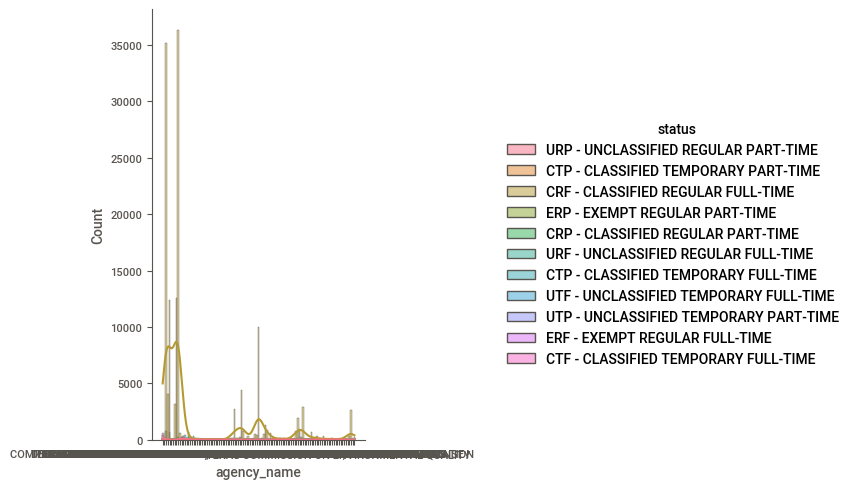

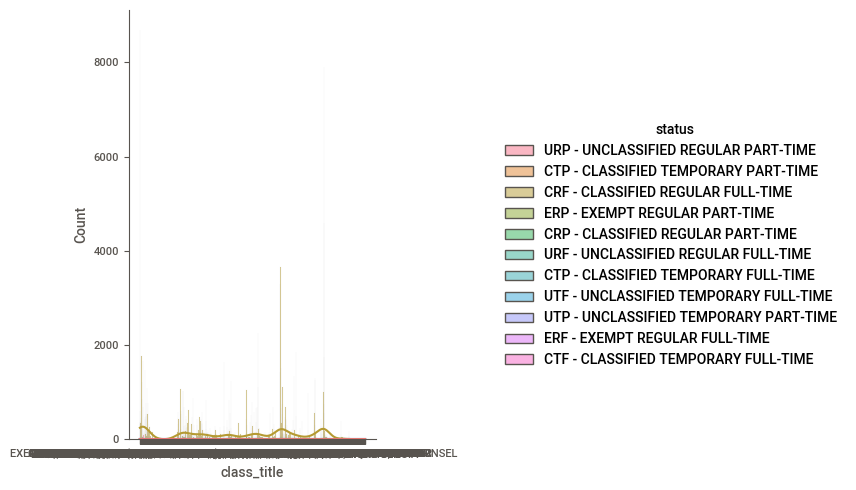

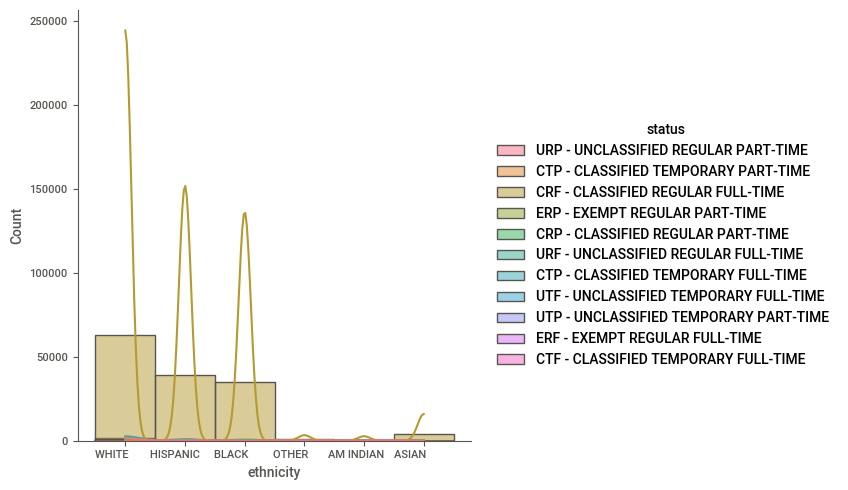

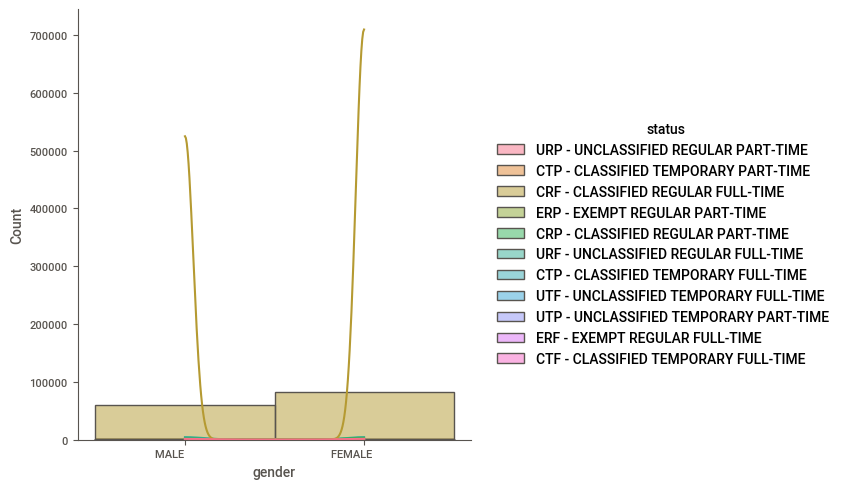

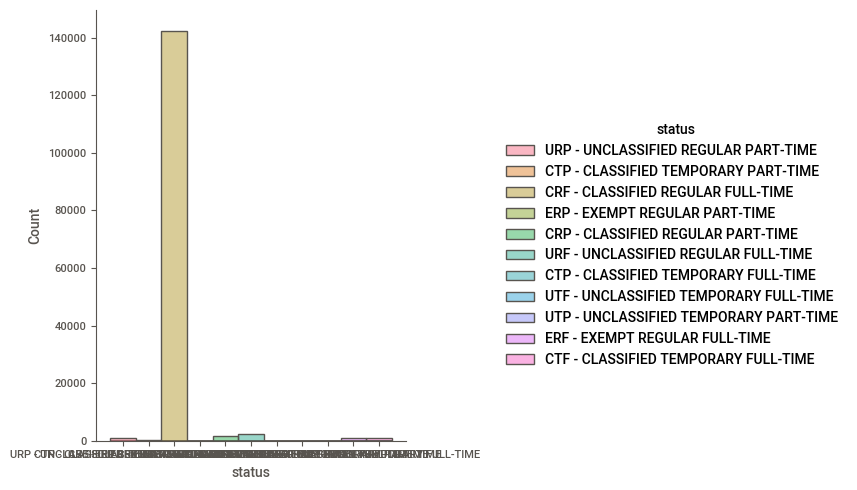

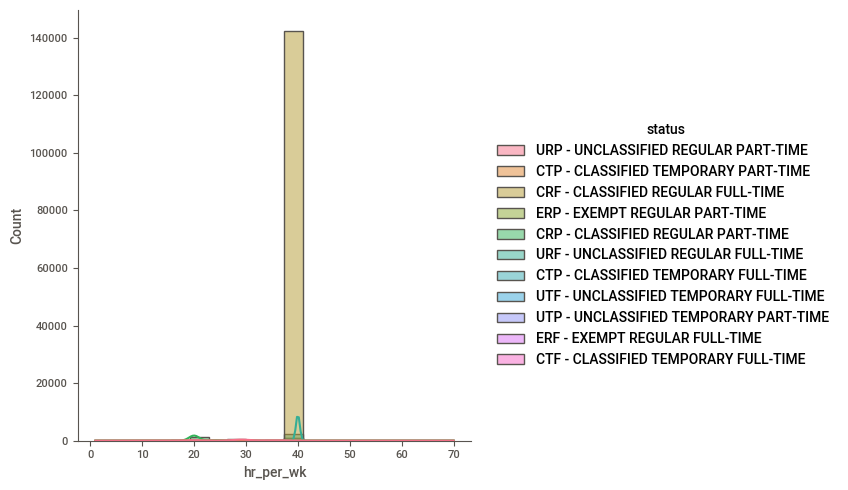

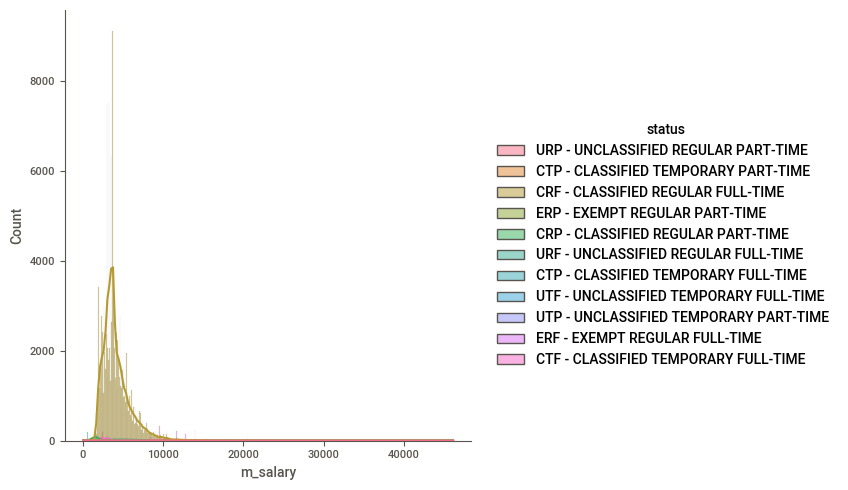

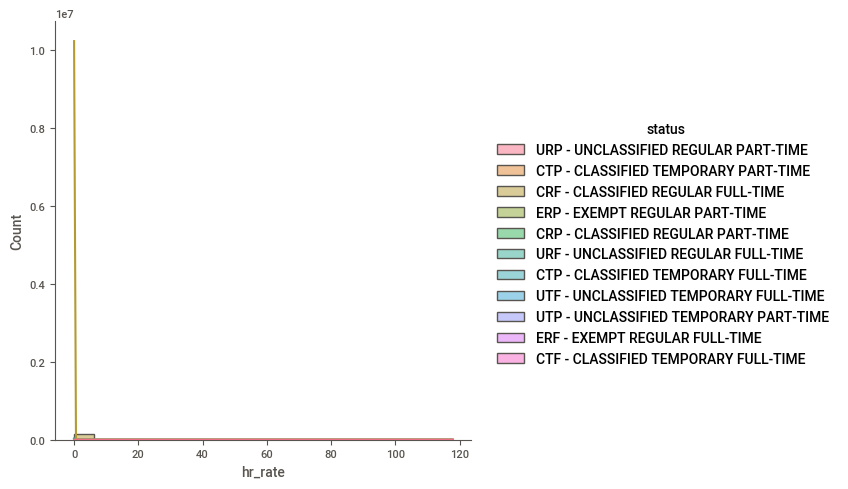

In [93]:
for columns in eda_data:
    sns.displot(x=columns, data=eda_data, kde=True, hue='status')
plt.show()

In [94]:
plt.figure(figsize=(20,20))
sns.relplot(x='class_title',y='a_salary',data=data, size=100)

In [95]:
plt.figure(figsize=(20,20))
sns.relplot(x='status',y='a_salary',data=data, size=10)

In [96]:
sns.relplot(x="state_no", y='a_salary',data=data)

In [97]:

sns.pairplot(eda_data)

<Figure size 2000x2000 with 0 Axes>

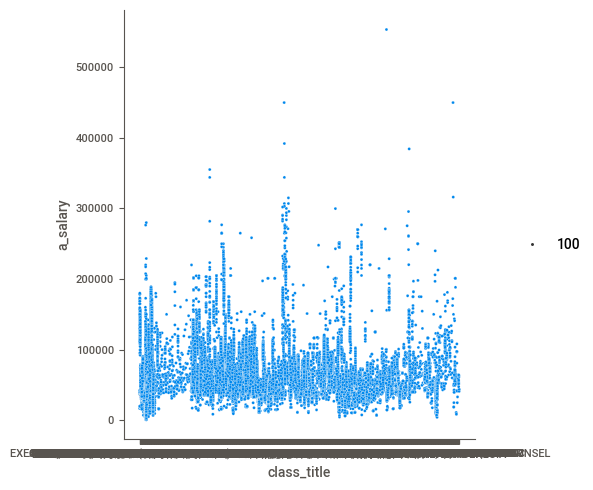

<Figure size 2000x2000 with 0 Axes>

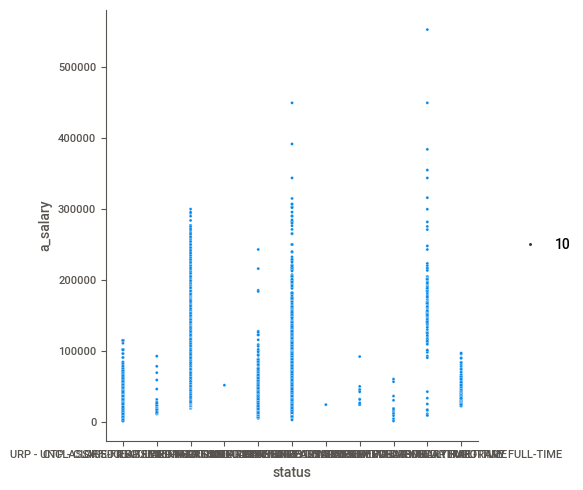

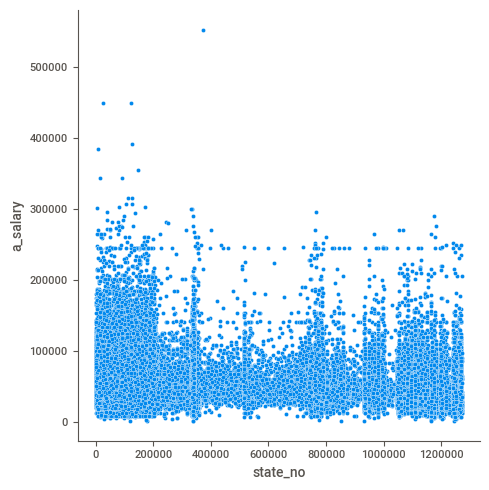

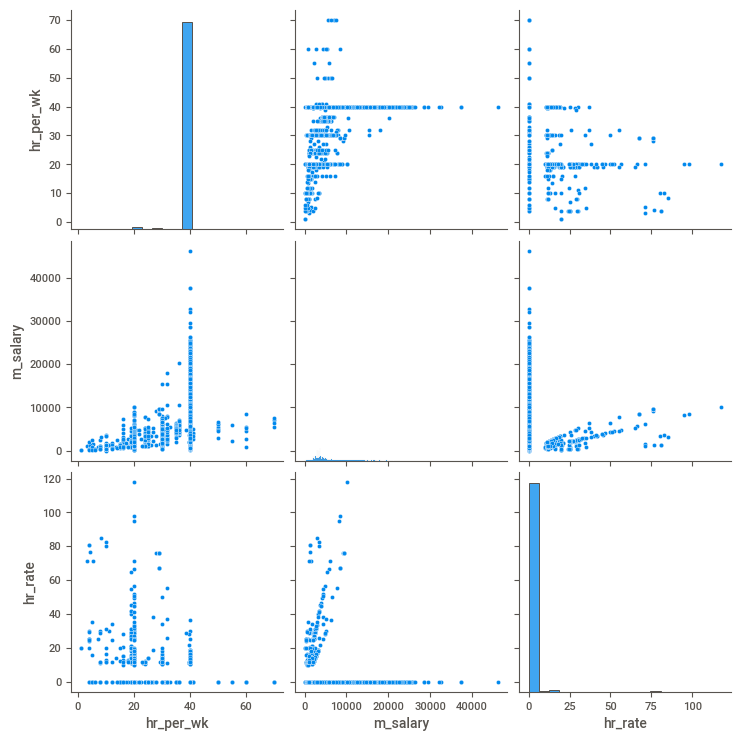

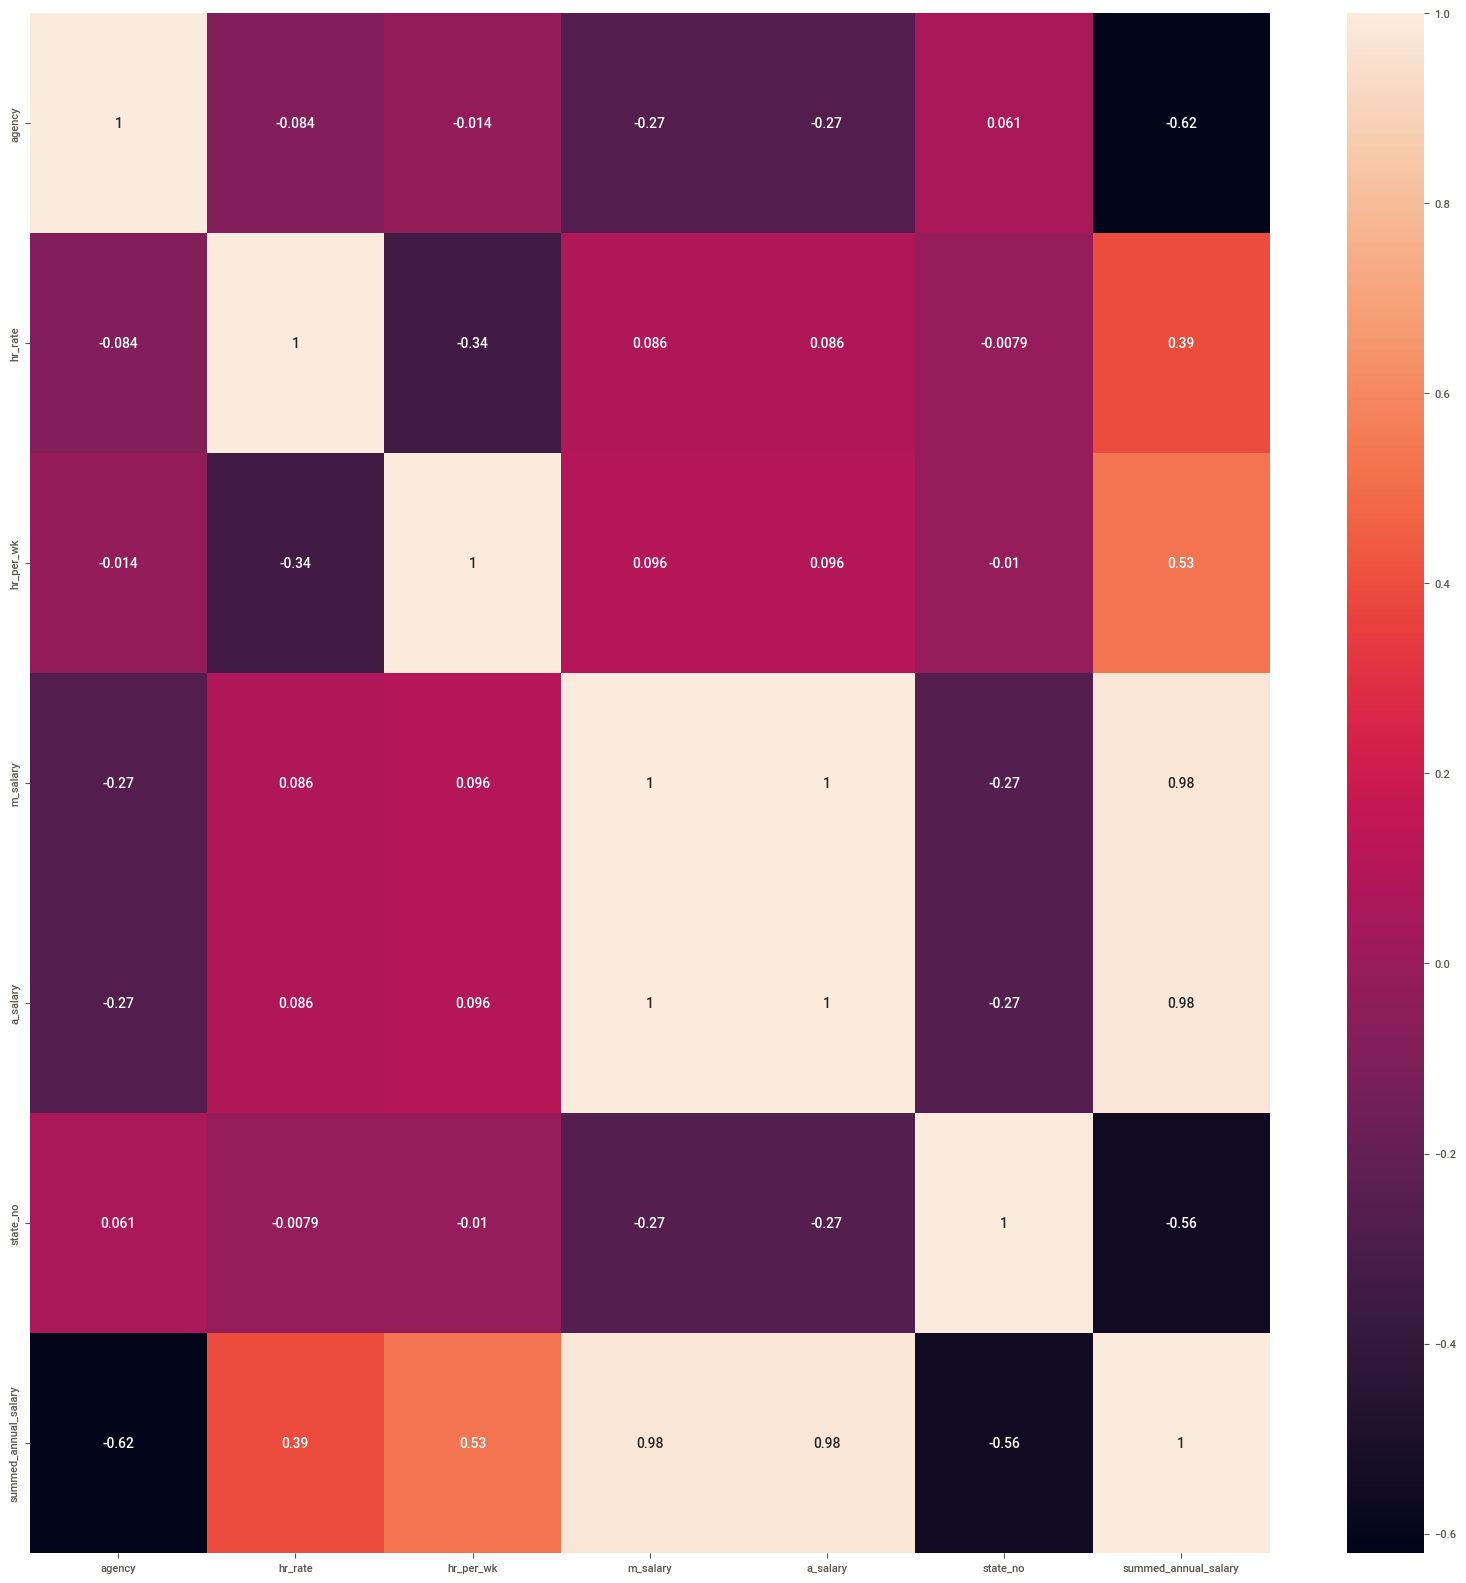

In [83]:
# Only include numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.show()


In [106]:
data.select_dtypes(include=['number']).corr()


,agency,hr_rate,hr_per_wk,m_salary,a_salary,state_no,summed_annual_salary
agency,1.000000,-0.083653,-0.013847,-0.266452,-0.266452,0.060815,-0.620697
hr_rate,-0.083653,1.000000,-0.337784,0.086291,0.086291,-0.007922,0.392481
hr_per_wk,-0.013847,-0.337784,1.000000,0.096041,0.096041,-0.010072,0.529473
m_salary,-0.266452,0.086291,0.096041,1.000000,1.000000,-0.265438,0.977757
a_salary,-0.266452,0.086291,0.096041,1.000000,1.000000,-0.265438,0.977757
state_no,0.060815,-0.007922,-0.010072,-0.265438,-0.265438,1.000000,-0.556907
summed_annual_salary,-0.620697,0.392481,0.529473,0.977757,0.977757,-0.556907,1.000000


In [110]:
data.head(1)

,agency,agency_name,l_name,f_name,m_initial,class_code,class_title,ethnicity,gender,status,emp_date,hr_rate,hr_per_wk,m_salary,a_salary,state_no,duplicated,comb_mlti_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717,True,NaN,131407.08,NaN


In [112]:
data.columns

Index(['agency', 'agency_name', 'l_name', 'f_name', 'm_initial', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'emp_date', 'hr_rate',
       'hr_per_wk', 'm_salary', 'a_salary', 'state_no', 'duplicated',
       'comb_mlti_jobs', 'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [114]:
data.isnull().sum()

agency                       0
agency_name                  0
l_name                       0
f_name                       0
m_initial                    0
class_code                   0
class_title                  0
ethnicity                    0
gender                       0
status                       0
emp_date                     0
hr_rate                      0
hr_per_wk                    0
m_salary                     0
a_salary                     0
state_no                     0
duplicated              149338
comb_mlti_jobs          149384
summed_annual_salary    149465
hide_from_search        149465
dtype: int64

In [116]:
data['duplicated'].unique()

array([True, nan], dtype=object)

In [118]:
data["duplicated"].value_counts()

duplicated
True    143
Name: count, dtype: int64

In [120]:
data["comb_mlti_jobs"].unique()

array([nan, True], dtype=object)

In [122]:

data["comb_mlti_jobs"].value_counts()

comb_mlti_jobs
True    97
Name: count, dtype: int64

In [124]:
data["summed_annual_salary"].unique()

array([131407.08,       nan, 171383.4 ,  31950.  ,  33300.  ,  33966.  ,
        39174.  ,  35570.52,  56952.6 ,  21839.76, 121200.  ,  90000.  ,
       150000.  ,  92400.  ,  18000.  ,  30312.84])

In [126]:
data["summed_annual_salary"].value_counts().sum()

16

In [128]:
data["hide_from_search"].unique()

array([nan, True], dtype=object)

In [130]:
data["hide_from_search"].value_counts()

hide_from_search
True    16
Name: count, dtype: int64

In [132]:
data=data.drop(['l_name','f_name','m_initial','class_code', 'emp_date',
              'duplicated','comb_mlti_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [134]:
data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.9615,29.0,9545.82,114549.84,127717


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agency       149481 non-null  int64  
 1   agency_name  149481 non-null  object 
 2   class_title  149481 non-null  object 
 3   ethnicity    149481 non-null  object 
 4   gender       149481 non-null  object 
 5   status       149481 non-null  object 
 6   hr_rate      149481 non-null  float64
 7   hr_per_wk    149481 non-null  float64
 8   m_salary     149481 non-null  float64
 9   a_salary     149481 non-null  float64
 10  state_no     149481 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 12.5+ MB


In [138]:
categorical_col = []  

for column in data:    
    if data[column].dtype == object and len(data[column].unique()): 
        categorical_col.append(column)                                   
        
        print(f"{column} : {data[column].unique()}")   
        print("======================================================================")

agency_name : ['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISL

In [140]:
categorical_cols = ['agency_name', 'class_title', 'gender', 'status', 'ethnicity']

In [142]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agency       149481 non-null  int64  
 1   agency_name  149481 non-null  int32  
 2   class_title  149481 non-null  int32  
 3   ethnicity    149481 non-null  int32  
 4   gender       149481 non-null  int32  
 5   status       149481 non-null  int32  
 6   hr_rate      149481 non-null  float64
 7   hr_per_wk    149481 non-null  float64
 8   m_salary     149481 non-null  float64
 9   a_salary     149481 non-null  float64
 10  state_no     149481 non-null  int64  
dtypes: float64(4), int32(5), int64(2)
memory usage: 9.7 MB


In [146]:
data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717


In [148]:
data.describe()

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,60.276202,624.022090,3.593253,0.429172,0.221634,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,28.849532,404.245777,1.359346,0.494960,1.164337,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,40.000000,292.000000,2.000000,0.000000,0.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,54.000000,494.000000,3.000000,0.000000,0.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,88.000000,983.000000,5.000000,1.000000,0.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,112.000000,1421.000000,5.000000,1.000000,10.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


In [176]:
data3= data[["hr_rate", "hr_per_wk", "m_salary", "a_salary" ]]

In [178]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data3:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()  

In [180]:
plt.figure(figsize=(30,20))
plotnumber=1
for column in data3:
        plt.subplot(2,2,plotnumber)
        sns.distplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()

In [181]:
IQR = stats.iqr(data.hr_rate, interpolation = 'midpoint') 
IQR

0.0

In [184]:
# First quartile (Q1) 
Q1 = data3.hr_rate.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.hr_rate.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [186]:
print(min_limit)
print(max_limit)

0.0
0.0


In [188]:
data.loc[data3['hr_rate'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717
1,212,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717
2,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115
3,212,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115
8,520,4,487,5,1,6,49.40717,20.0,4281.95,51383.40,147334
...,...,...,...,...,...,...,...,...,...,...,...
149467,809,76,324,5,1,2,11.50000,40.0,1993.33,23919.96,1142494
149468,809,76,324,5,0,1,12.00000,20.0,1040.00,12480.00,1127553
149474,809,76,324,5,0,1,11.50000,20.0,996.66,11959.92,89332
149478,809,76,324,5,1,1,12.93000,20.0,1120.60,13447.20,34266


In [190]:
data.loc[data3['hr_rate'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no


In [192]:
data3.loc[data3['hr_rate'] > max_limit,'hr_rate']=np.median(data3.hr_rate)

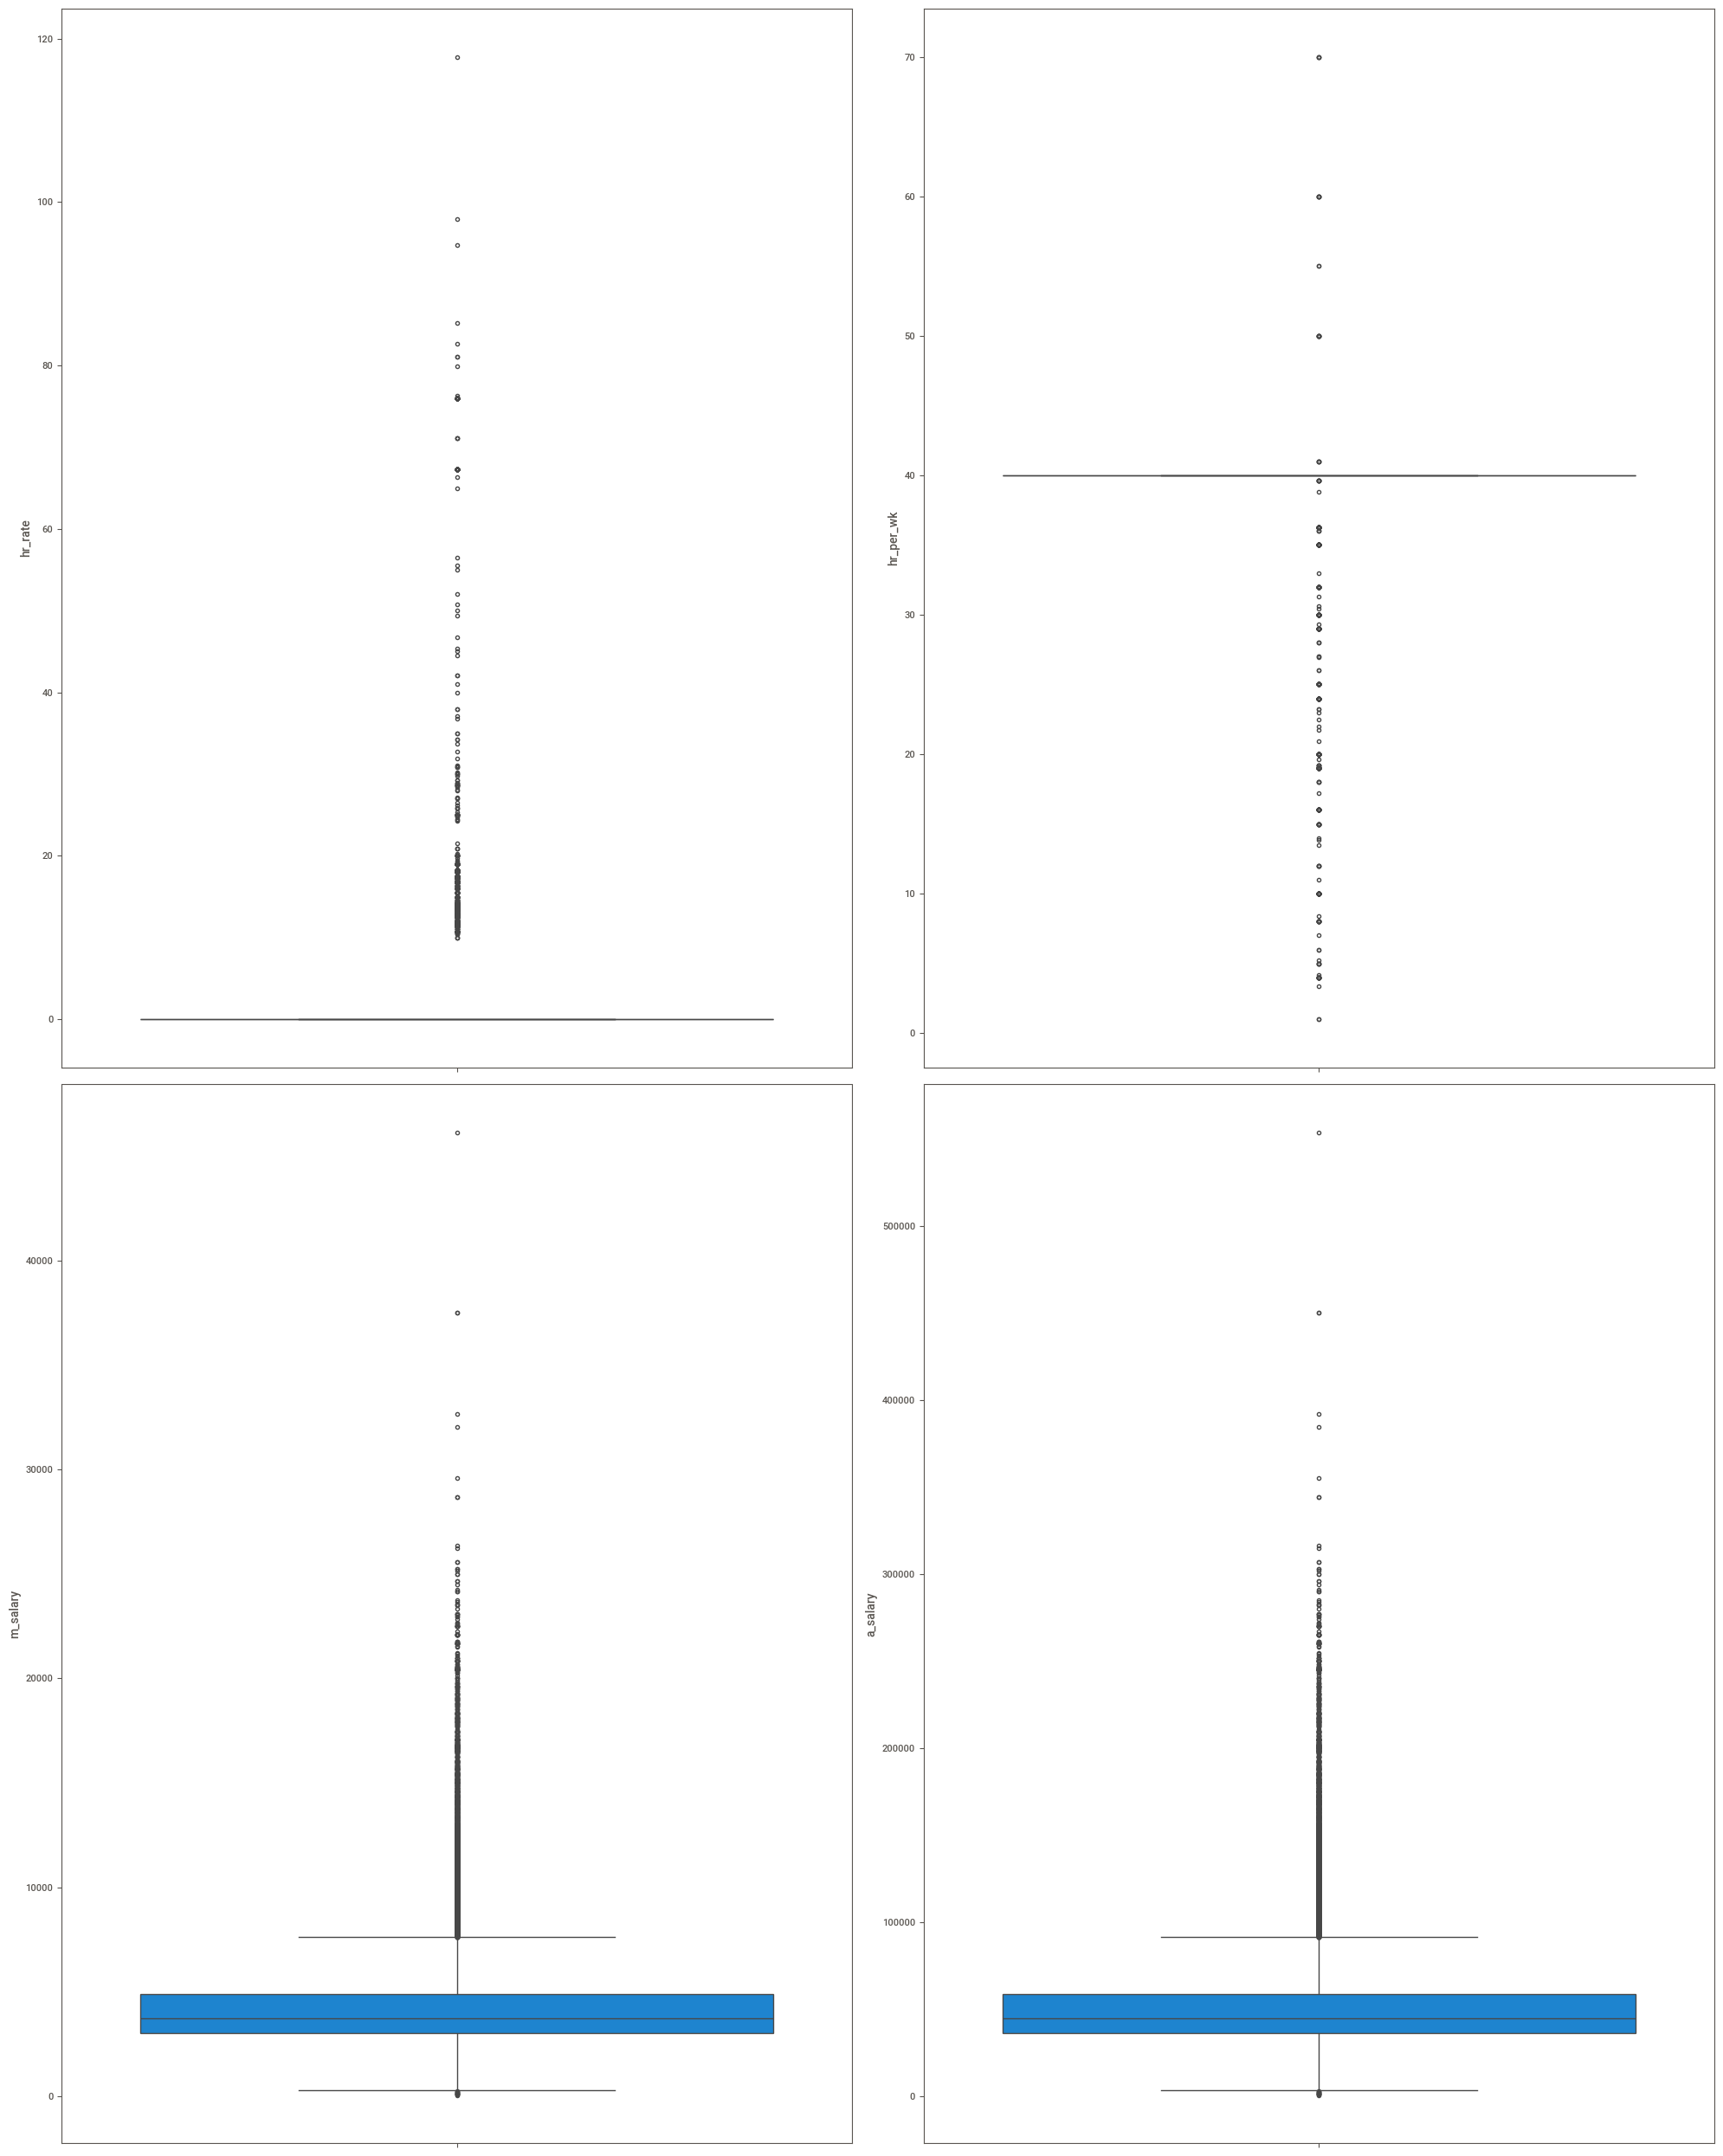

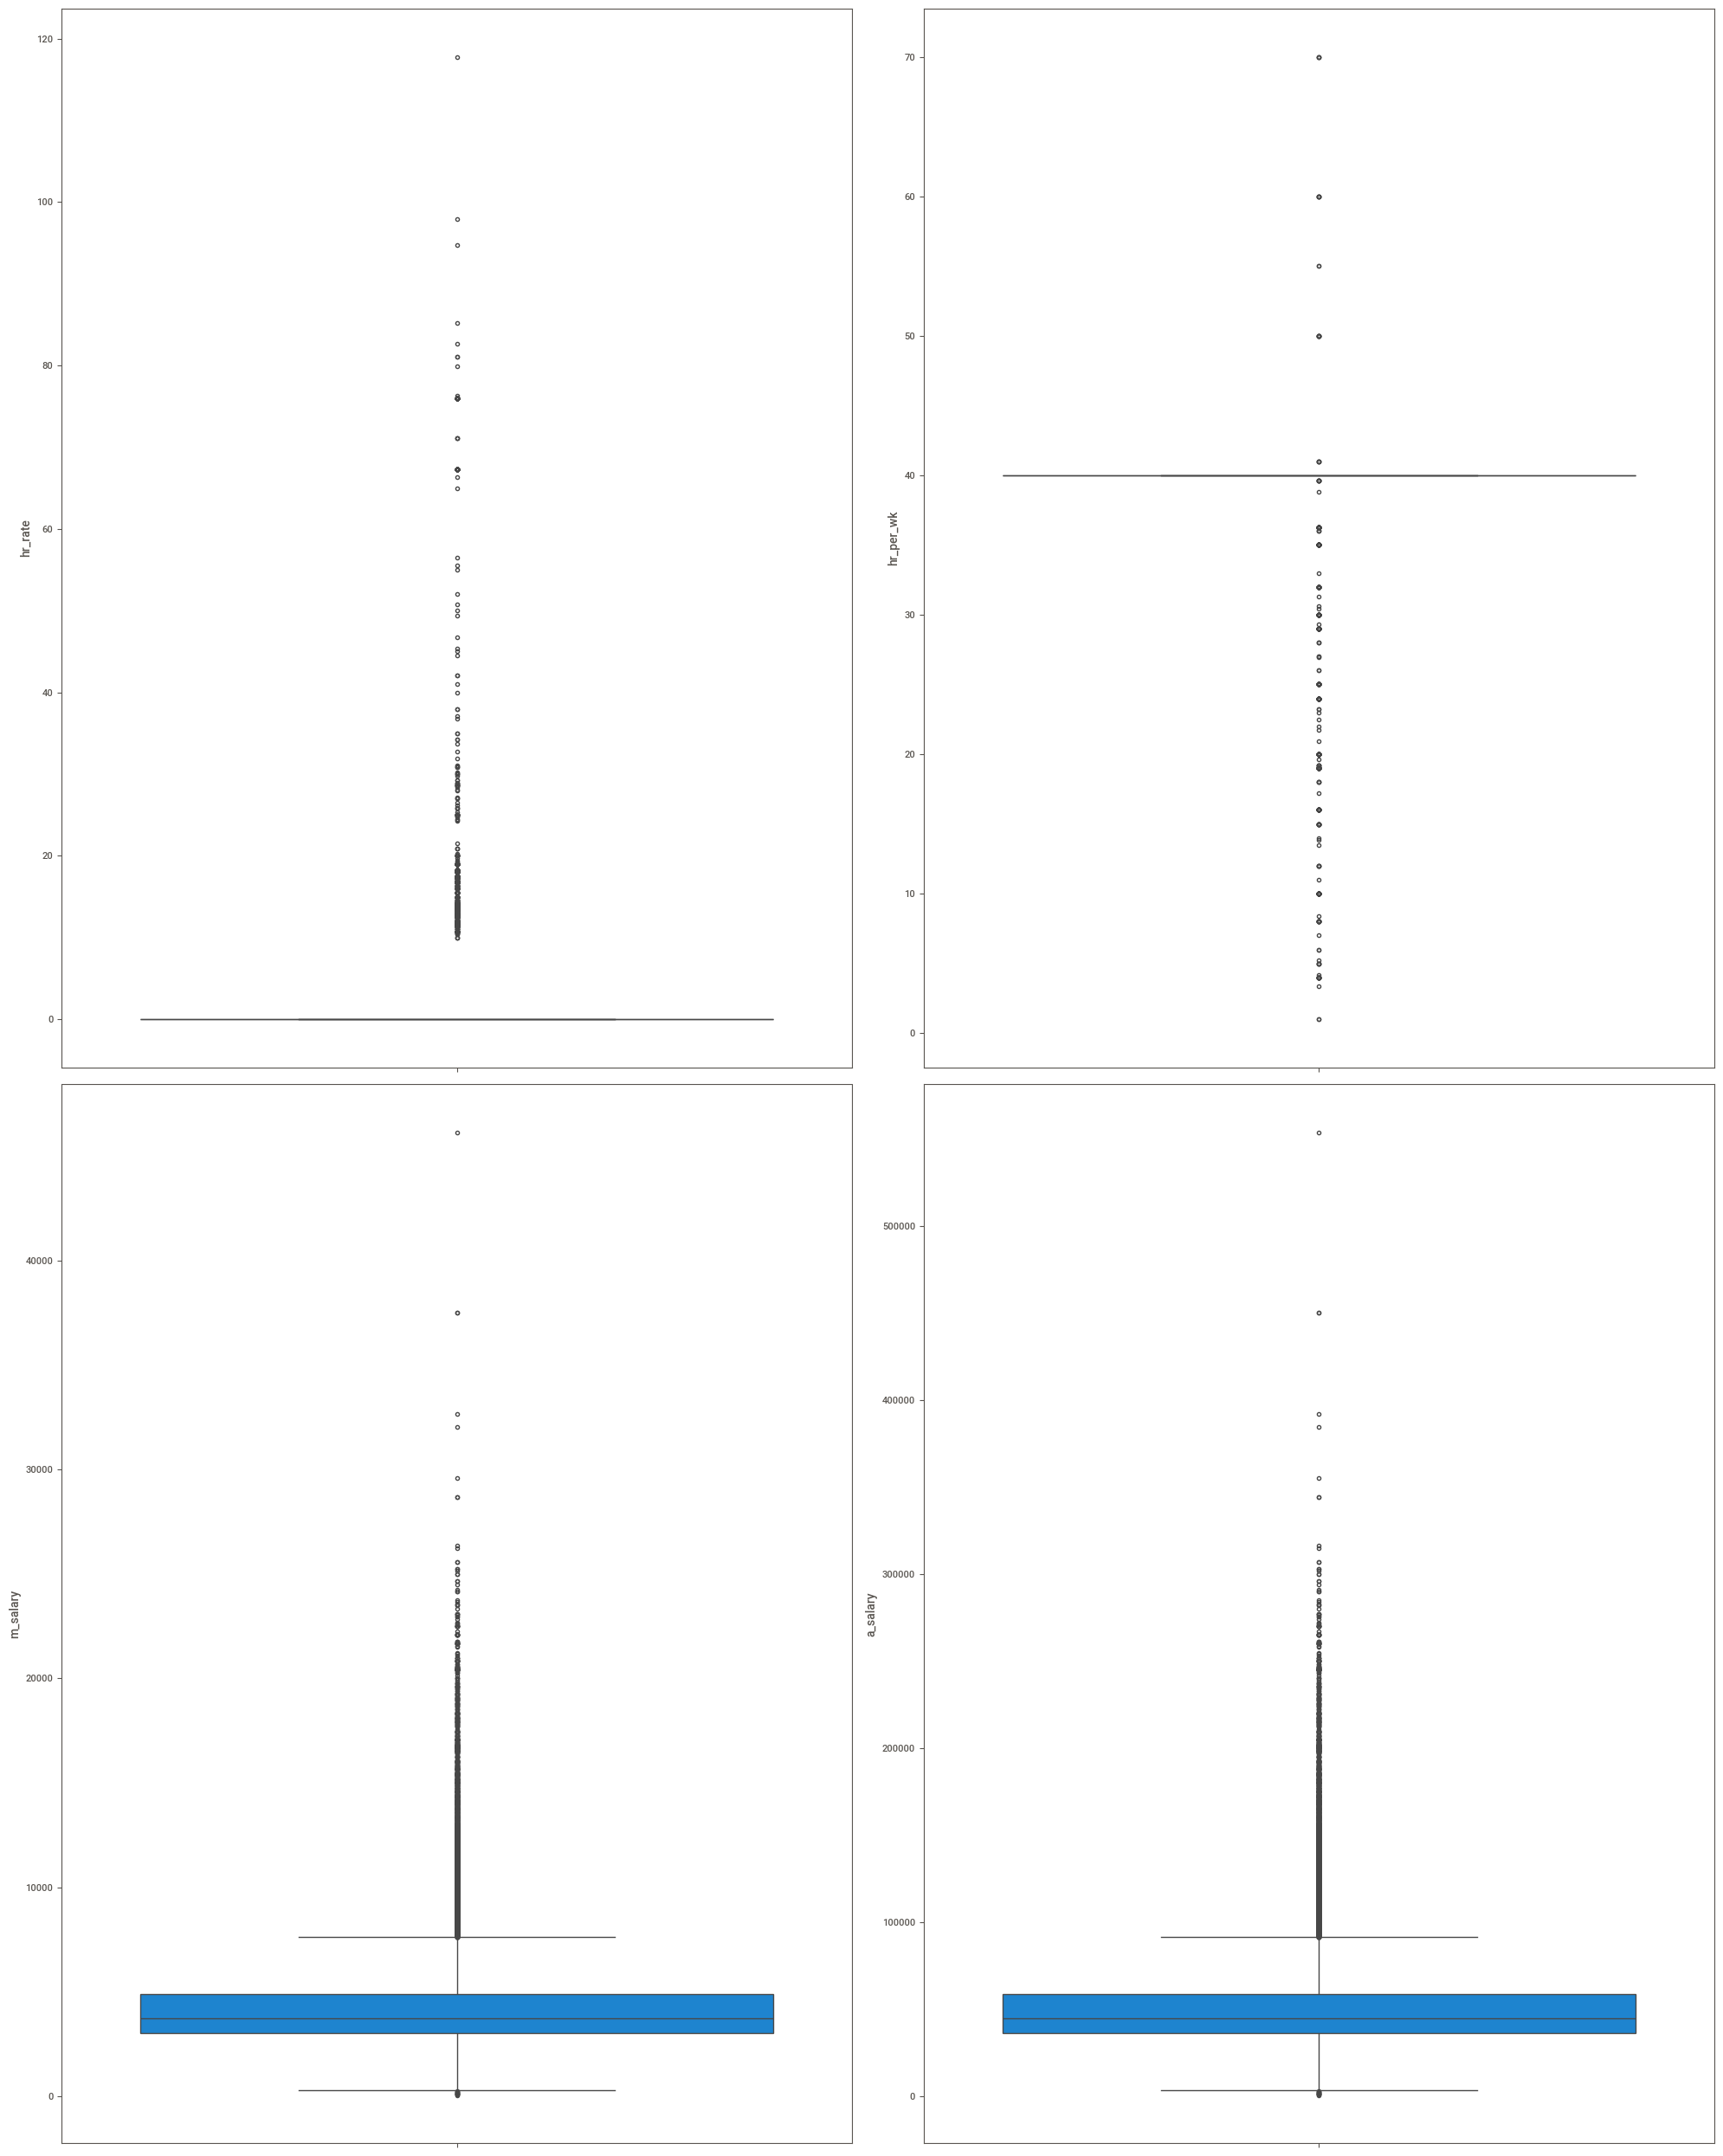

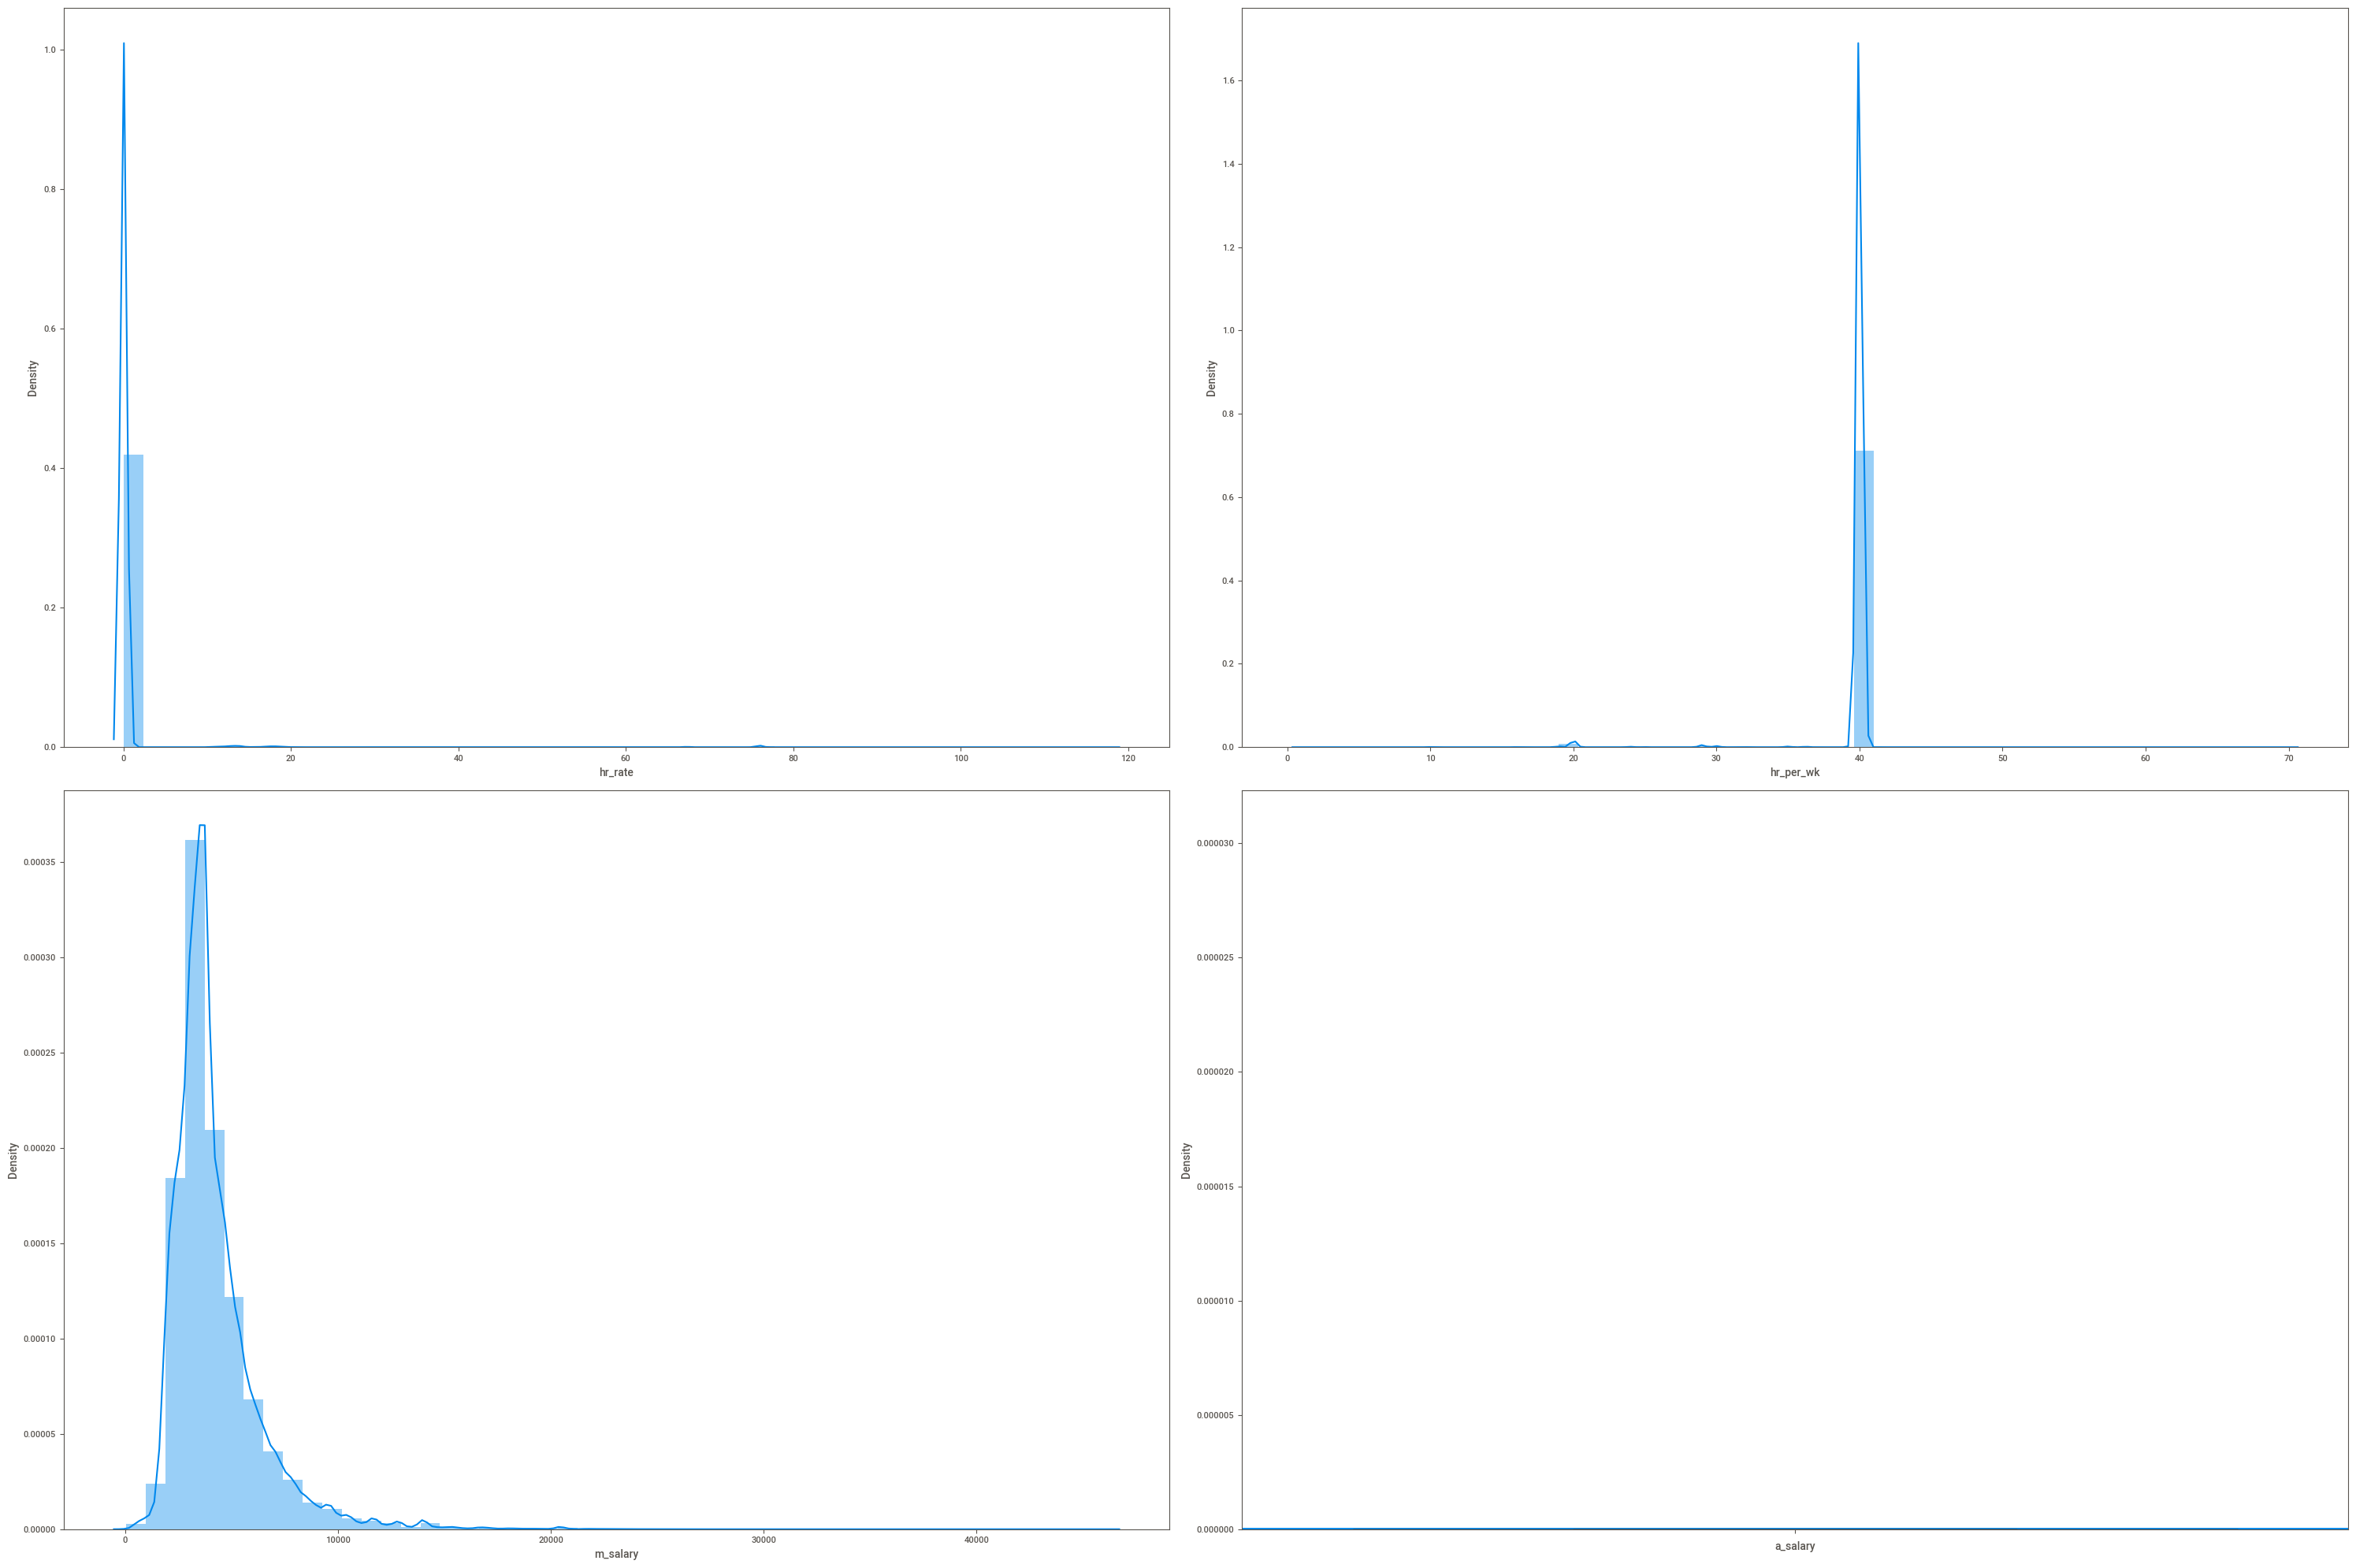

In [194]:
sns.boxplot(data3.hr_rate)
plt.show()

In [196]:
IQR = stats.iqr(data.hr_per_wk, interpolation = 'midpoint') 
IQR

0.0

In [198]:
# First quartile (Q1) 
Q1 = data3.hr_per_wk.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.hr_per_wk.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [200]:

print(min_limit)
print(max_limit)

40.0
40.0


In [202]:

data.loc[data3['hr_per_wk'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
37,101,67,751,3,0,7,0.0,41.0,2694.26,32331.12,1164354
53,101,67,765,5,0,7,0.0,41.0,4140.18,49682.16,37375
56,101,67,751,5,1,7,0.0,41.0,4098.93,49187.16,51668
63,101,67,751,3,0,7,0.0,41.0,3365.40,40384.80,152257
78,101,67,751,5,1,7,0.0,41.0,5021.45,60257.40,152770
80,102,42,442,5,1,7,0.0,50.0,3000.00,36000.00,531649
81,102,42,442,3,0,7,0.0,60.0,922.50,11070.00,194014
82,102,42,442,3,1,7,0.0,55.0,2280.59,27367.08,182335
83,102,42,442,5,0,7,0.0,60.0,5437.07,65244.84,152904
84,102,42,442,5,0,7,0.0,50.0,6250.00,75000.00,1055307


In [204]:
data.loc[data3['hr_per_wk'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717
1,212,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717
2,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115
3,212,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115
8,520,4,487,5,1,6,49.40717,20.0,4281.95,51383.40,147334
...,...,...,...,...,...,...,...,...,...,...,...
149465,809,76,324,4,0,1,12.00000,20.0,1040.00,12480.00,1246178
149468,809,76,324,5,0,1,12.00000,20.0,1040.00,12480.00,1127553
149474,809,76,324,5,0,1,11.50000,20.0,996.66,11959.92,89332
149478,809,76,324,5,1,1,12.93000,20.0,1120.60,13447.20,34266


In [206]:
data3.loc[data3['hr_per_wk'] > max_limit,'hr_per_wk']=np.median(data3.hr_per_wk)

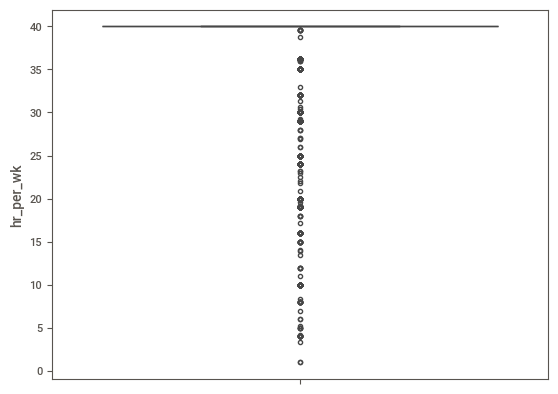

In [208]:
sns.boxplot(data3.hr_per_wk)
plt.show()

In [210]:
IQR = stats.iqr(data.m_salary, interpolation = 'midpoint') 
IQR


1845.9700000000003

In [212]:
# First quartile (Q1) 
Q1 = data3.m_salary.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.m_salary.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [214]:
print(min_limit)
print(max_limit)

250.88499999999976
7634.765000000001


In [216]:

data.loc[data3['m_salary'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717
2,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115
5,302,54,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785
7,510,82,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334
36,101,67,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800
...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971
149393,809,76,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905
149401,809,76,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235
149415,809,76,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817


In [218]:
data.loc[data3['m_salary'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
141394,101,67,751,5,1,10,20.0,1.0,86.66,1039.92,176291
141415,101,67,751,4,0,10,20.0,1.0,86.66,1039.92,1246122
141808,102,42,442,3,1,8,0.0,10.0,100.00,1200.00,118315
141809,102,42,442,5,0,8,0.0,10.0,200.00,2400.00,1164537
141897,102,42,442,3,1,8,0.0,20.0,100.00,1200.00,338420
141901,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,931560
142033,102,42,442,5,0,8,0.0,20.0,250.00,3000.00,1247654
142067,102,42,442,2,1,8,0.0,10.0,50.00,600.00,851628
142114,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,336571
142205,102,42,442,5,0,8,0.0,4.0,210.12,2521.44,775718


In [220]:
data3.loc[data3['m_salary'] > max_limit,'m_salary']=np.median(data3.m_salary)

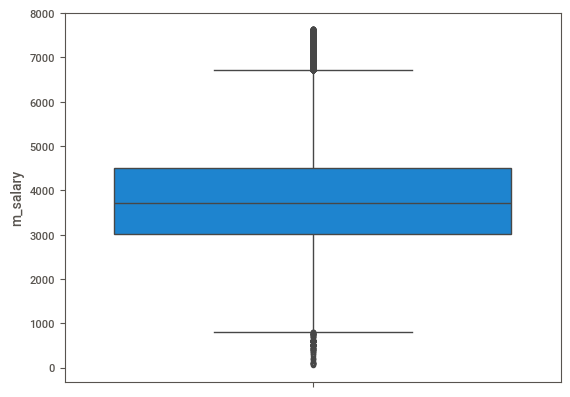

In [222]:

sns.boxplot(data3.m_salary)
plt.show()

In [224]:
# using IQR to remove the outliers of "a_salary"
IQR = stats.iqr(data.a_salary, interpolation = 'midpoint') 
IQR

22151.64

In [226]:
# First quartile (Q1) 
Q1 = data3.a_salary.quantile(0.25)

In [228]:
# Third quartile (Q3) 
Q3 = data3.a_salary.quantile(0.75)

In [230]:
##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [232]:
print(min_limit)
print(max_limit)

3010.6200000000026
91617.18


In [234]:
data.loc[data3['a_salary'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717
2,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115
5,302,54,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785
7,510,82,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334
36,101,67,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800
...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971
149393,809,76,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905
149401,809,76,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235
149415,809,76,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817


In [236]:

data.loc[data3['a_salary'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
141394,101,67,751,5,1,10,20.0,1.0,86.66,1039.92,176291
141415,101,67,751,4,0,10,20.0,1.0,86.66,1039.92,1246122
141808,102,42,442,3,1,8,0.0,10.0,100.00,1200.00,118315
141809,102,42,442,5,0,8,0.0,10.0,200.00,2400.00,1164537
141897,102,42,442,3,1,8,0.0,20.0,100.00,1200.00,338420
141901,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,931560
142033,102,42,442,5,0,8,0.0,20.0,250.00,3000.00,1247654
142067,102,42,442,2,1,8,0.0,10.0,50.00,600.00,851628
142114,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,336571
142205,102,42,442,5,0,8,0.0,4.0,210.12,2521.44,775718


In [238]:
data3.loc[data3['a_salary'] > max_limit,'a_salary']=np.median(data3.a_salary)


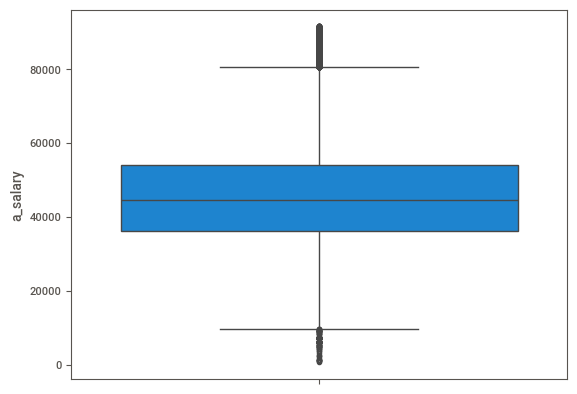

In [240]:
sns.boxplot(data3.a_salary)
plt.show()

In [242]:

data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717


In [244]:

data.columns

Index(['agency', 'agency_name', 'class_title', 'ethnicity', 'gender', 'status',
       'hr_rate', 'hr_per_wk', 'm_salary', 'a_salary', 'state_no'],
      dtype='object')

In [246]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True)

<Axes: >

In [248]:
    final_data = data [ ['agency', 'agency_name', 'class_title', 'ethnicity', 'gender', 'status',
       'hr_rate', 'hr_per_wk', 'm_salary', 'a_salary', 'state_no'] ]

In [250]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
num_cols = ["hr_rate","hr_per_wk","m_salary","a_salary","state_no"]

final_data[num_cols] = scaler.fit_transform(final_data[num_cols])

In [252]:

final_data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,17.954538,-4.610854,2.541505,2.541505,-0.914037


In [254]:
# create dependent and independent variable
X=final_data.drop(['a_salary'], axis=1)
y=final_data[['a_salary']]

In [256]:
X

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,state_no
0,241,17,711,5,1,8,17.954538,-4.610854,2.541505,-0.914037
1,212,48,560,5,1,4,19.161489,-15.368878,-1.347957,-0.914037
2,241,17,711,5,1,8,17.954538,-4.610854,2.541505,-1.057370
3,212,48,560,5,1,4,19.161487,-15.368878,-1.347957,-1.057370
4,696,88,292,3,0,0,-0.082272,0.122677,-0.450008,-0.836077
...,...,...,...,...,...,...,...,...,...,...
149476,809,76,1198,5,1,0,-0.082272,0.122677,-0.634074,0.429544
149477,809,76,1404,5,0,0,-0.082272,0.122677,0.608577,0.589692
149478,809,76,324,5,1,1,2.987914,-8.483742,-1.483721,-1.109288
149479,809,76,1007,5,1,0,-0.082272,0.122677,0.725227,-0.922869


In [258]:
y

,a_salary
0,2.541505
1,-1.347957
2,2.541505
3,-1.347957
4,-0.450008
...,...
149476,-0.634074
149477,0.608577
149478,-1.483721
149479,0.725227


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [262]:
X_train

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,state_no
29119,454,89,1034,3,0,0,-0.082272,0.122677,0.679706,-0.517047
90072,601,91,19,5,0,0,-0.082272,0.122677,0.046350,-1.071335
64932,529,40,543,3,0,0,-0.082272,0.122677,-1.183784,-0.808272
27044,405,28,1198,5,0,0,-0.082272,0.122677,-0.626378,-0.956860
88422,601,91,399,3,1,0,-0.082272,0.122677,2.901821,-0.814680
...,...,...,...,...,...,...,...,...,...,...
55366,529,40,1056,2,0,0,-0.082272,0.122677,-0.782557,-0.458312
123012,696,88,294,2,1,1,-0.082272,-8.483742,-1.297720,1.438781
59358,529,40,235,2,0,0,-0.082272,0.122677,-0.830271,-0.959338
103904,696,88,292,2,1,0,-0.082272,0.122677,-0.356129,0.893672


In [264]:
y_train

,a_salary
29119,0.679706
90072,0.046350
64932,-1.183784
27044,-0.626378
88422,2.901821
...,...
55366,-0.782557
123012,-1.297720
59358,-0.830271
103904,-0.356129


In [266]:

from sklearn.linear_model import LinearRegression  
LR = LinearRegression()                           
LR.fit(X_train,y_train)             
y_predict = LR.predict(X_test)

In [268]:

y_test #actual

,a_salary
3323,-0.426569
104462,-0.576342
124349,-0.241753
141653,-1.032769
76028,1.001133
...,...
60969,-0.847036
90356,0.050612
132537,-0.356129
59553,0.809284


In [270]:

y_predict #predicted

array([[-0.42656932],
       [-0.57634205],
       [-0.24175296],
       ...,
       [-0.35612851],
       [ 0.80928382],
       [-0.61431435]])

In [272]:
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr_r2score = r2_score(y_test,y_predict) 
lr_r2score

1.0

In [274]:

X_test.shape

(37371, 10)

In [276]:
## calculation of adjusted r2 score
lr_adjusted_r2 = 1-(1-1)*(37371-10)/(37371-10-1) 
lr_adjusted_r2

1.0

In [278]:
# Mean Squared Error & Mean Absolute Error
import math
lr_mse  = mean_squared_error(y_test, y_predict)
lr_rmse = math.sqrt(mean_squared_error(y_test,y_predict))
lr_mae  = mean_absolute_error(y_test, y_predict)

In [280]:
print("MSE :", lr_mse)
print("RMSE :", lr_rmse)
print("MAE :", lr_mae)

MSE : 7.615279855945434e-28
RMSE : 2.7595796520385917e-14
MAE : 2.3591274970233894e-14


In [282]:

from sklearn.tree import DecisionTreeRegressor 

DTR= DecisionTreeRegressor(random_state=44)
DTR.fit(X_train, y_train)
predictions = DTR.predict(X_test)

In [284]:
#Model evaluation
dtr_r2score = r2_score(y_test,predictions)
dtr_r2score

0.9984889572214578

In [286]:
dtr_adjusted_r2 = 1-(1-0.99)*(37371-10)/(37371-10-1)
dtr_adjusted_r2

0.9899997323340471

In [288]:
dtr_mse  = mean_squared_error(y_test, predictions)
dtr_rmse = math.sqrt(mean_squared_error(y_test,predictions))
dtr_mae  = mean_absolute_error(y_test, predictions)

In [290]:
print("MSE :", dtr_mse)
print("RMSE :", dtr_rmse)
print("MAE :", dtr_mae)

MSE : 0.0015820968651304097
RMSE : 0.039775581267033795
MAE : 0.0004090616766236421


### Model creation by using Random forest regressor :

In [293]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [294]:
y_predict=rfr.predict(X_test)
y_predict

array([-0.42656932, -0.57634205, -0.24175296, ..., -0.35612851,
        0.80928429, -0.61431435])

In [295]:
rfr_r2score = r2_score(y_test,y_predict)
rfr_r2score

0.9979707064555714

In [296]:
rfr_adjusted_r2 = 1-(1-0.99)*(37371-10)/(37371-10-1)
rfr_adjusted_r2

0.9899997323340471

In [297]:
print('MSE :',mean_squared_error(y_test, y_predict))
print('MAE :',mean_absolute_error(y_test, y_predict))

MSE : 0.0021247174472236938
MAE : 0.0004964083921256698


## Model creation by using GradientBoostingRegressor :

In [313]:
gbr=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
gbr.fit(X_train,y_train)
y_predict=gbr.predict(X_test)

In [305]:
rfr_r2score = r2_score(y_test,y_predict)
rfr_r2score

0.8427327363126637

In [306]:
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))

Mean Squard Error IS :      0.1646624757423612
Mean Absolute Error Is :    0.25629091826960626


In [307]:
y_test

,a_salary
3323,-0.426569
104462,-0.576342
124349,-0.241753
141653,-1.032769
76028,1.001133
...,...
60969,-0.847036
90356,0.050612
132537,-0.356129
59553,0.809284


### Task 3
#### Who are the outliers in the salaries?

In [324]:
data = pd.read_csv("C:/Users/CSC/salary.csv")

In [325]:
data.head(1)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN


In [328]:
sns.boxplot(x='ANNUAL',data=data)

<Axes: xlabel='ANNUAL'>

In [330]:
IQR=stats.iqr(data.ANNUAL,interpolation='midpoint')
IQR

22151.64

In [332]:
Q1=data.ANNUAL.quantile(0.25)
Q3=data.ANNUAL.quantile(0.75)
print(Q1)
print(Q3)

36238.08
58389.72


In [334]:
low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print(low_limit)
print(upp_limit)

3010.6200000000026
91617.18


In [336]:
lower = data.loc[data['ANNUAL']<low_limit]
lower

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
141901,102,HOUSE OF REPRESENTATIVES ...,CUTBIRTH,JOE,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,931560,NaN,NaN,NaN,NaN,NaN
142033,102,HOUSE OF REPRESENTATIVES ...,HARRIS,KATHARINE,T,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,250.00,3000.00,1247654,NaN,NaN,NaN,NaN,NaN
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN


In [338]:
upper = data.loc[data['ANNUAL']>upp_limit]
upper

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [340]:
df=pd.concat([lower,upper])
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [342]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [344]:
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [346]:
data[['AGENCY NAME','ANNUAL']]

,AGENCY NAME,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
1,OFFICE OF COURT ADMINISTRATION ...,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
3,OFFICE OF COURT ADMINISTRATION ...,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,39411.24
...,...,...
149476,STATE PRESERVATION BOARD ...,34788.00
149477,STATE PRESERVATION BOARD ...,66000.00
149478,STATE PRESERVATION BOARD ...,13447.20
149479,STATE PRESERVATION BOARD ...,68929.92


In [348]:
max_salary = data['ANNUAL'].max()
min_salary = data['ANNUAL'].min()

In [350]:
print(max_salary)
print(min_salary)

553500.0
600.0


In [352]:
row_with_max_salary = df.loc[data['ANNUAL'] == 553500]
row_with_max_salary 

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [354]:
row_with_min_salary = df.loc[data['ANNUAL'] == 600]
row_with_min_salary 

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


In [356]:
data1=data[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
data1

,AGENCY NAME,CLASS TITLE,ANNUAL,EMPLOY DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,39411.24,06/29/20
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,34788.00,10/30/17
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,66000.00,07/13/15
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,13447.20,10/15/12
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,68929.92,09/22/89


In [358]:
df = data1.groupby(['AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
x = df.first()
x

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

In [360]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)



R²: 0.8427327363126637
MSE: 0.16466247574236123
RMSE: 0.40578624390479434
MAE: 0.25629091826960637
